# <center> Tarea 1

###     Punto 1
    
*Related with the nature of the data, which conditions should meet matrices $A$ and $b$ to be solvable from the least squares perspective.*

Para desarrollar satisfactoriamente esta pregunta vamos a analizar cómo surge el problema de mínimos cuadrados relativo a la naturaleza de los datos.

Dado un conjunto de datos $\mathcal{D} = \{ \vec{u}_i, v_i \}_{i = 1, \ldots, N} \subset \mathbb{R}^{d+1}$, con ánimos de predecir o estimar datos no suministrados ajustaremos los datos dados a un modelo lineal. Supongamos que el hiperplano que mejor se ajusta a los datos es $ \vec{w}^T \vec{x} + r = 0 $, luego el error de estimación del modelo en cada dato es

$$
    \varepsilon_i = \vec{w}^T \vec{u}_i  + r - v_i = r + \vec{u}_i^T \vec{w} - v_i, \quad\quad i=1, \ldots, N.
$$

Ejemplificamos mediante la siguiente gráfica cada uno de estos errores representado por las líneas rojas.

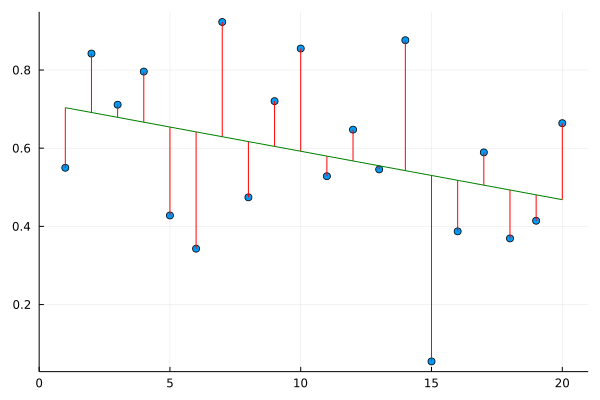

In [41]:
# Importamos las librerias para generar datos aleatorios de acuerdo a una distribución y para graficar los resultados
using Plots, Random, Distributions

n = 20; # Cantidad de datos
A = [ones(n,1) Array((1:n))]; # Matriz del sistema de mínimos cuadrados (se discute luego)
b = rand(Normal(0.5, 0.25), n); # Generados puntos aleatorios bien distribuidos
x = A\b; # Solucionamos por mínimos cuadrados y encontramos los parámetros del modelo lineal

lmodel = x[2]*A[:,2] + x[1]*ones(n,1) # Definimos el modelo lineal encontrado

plot(1:n, b, seriestype = :scatter, legend = false, xlims = (0, n + 0.99)) # Graficamos los puntos
for i in 1:n   # Graficamos los errores del modelo en cada punto
    plot!([i, i], [b[i], lmodel[i]], color = "red")
end
plot!(1:n, lmodel, color = "green") # Graficamos la aproximación lineal

Podemos expresar lo anterior matricialmente como $\vec{\varepsilon} = A\vec{x} - \vec{v}$ donde 

$$
    A = 
    \begin{pmatrix}
      1 & - & \vec{u}_1^T & - \\ 
      1 & - & \vec{u}_2^T & - \\
      \vdots &  & \vdots &  \\
      1 & - & \vec{u}_N^T & - \\
    \end{pmatrix}
    \in \mathcal{M}_{N \times (d+1)}(\mathbb{R}),
    \quad
    \vec{x} = ( r, \vec{w} )^T
    \quad
    \text{y}
    \quad
    \vec{v} = (v_1, v_2, \ldots, v_N)^T.
$$

Para obtener un bueno modelo buscamos minimizar el error y para ello una forma de hacerlo es minimizar el cuadrado de la norma de este vector de error, planteando así el siguiente problema de optimización:

$$
    \mbox{arg min}_{\vec{x}} \| \varepsilon \|_2^2 = \mbox{arg min}_{\vec{x}} \| A\vec{x} - \vec{v} \|_2^2.
$$

Con lo anterior no solo llegamos al problema de los mínimos cuadrados como es conocido sino que además encontramos una forma más explícita de sus elementos en términos de los datos. Ahora, intentamos resolver el problema para ver cuáles son las condiciones sobre $A$ y $\vec{v}$ para que el problema tenga solución y luego ver estas condiciones en términos de los datos.

La función objetivo del problema es $f(\vec{x}) = \| A\vec{x} - \vec{v} \|_2^2$ que es una función convexa pues $A\vec{x} - \vec{v}$ es lineal y luego su cuadrado es convexo, con lo cual el problema de optimización **es un problema convexo** y, afortunamente de este tipo de problemas sabemos muy bien cómo atacarlos, en principio sabemos que si la función objetivo es diferenciable entonces el mínimo global estará en el punto crítico. Para trabajar sobre la anterior idea observemos que la función objetivo la podemos reescribir como

$$
    \begin{align*}
        f(\vec{x}) & = \| A\vec{x} - \vec{v}\|_2^2 \\
            & = ( A\vec{x} - \vec{v} )^T ( A\vec{x} - \vec{v} ) \\
            & = (A \vec{x})^T (A \vec{x}) - (A \vec{x})^T \vec{v} - \vec{v}^T (A \vec{x}) + \vec{v}^T \vec{v} \\
            & = \vec{x}^T A^T A\vec{x} - 2 \vec{x}^T A^T \vec{v} + \vec{v}^T \vec{v}
    \end{align*}
$$

Con lo cual podemos calcular su derivada

$$
    \frac{\partial}{\partial\vec{x}}\left( f(\vec{x}) \right) = \frac{\partial}{\partial\vec{x}}\left( \vec{x}^T A^T A\vec{x} - 2 \vec{x}^T A^T \vec{v} + \vec{v}^T \vec{v} \right)  = - 2 A^T \vec{v} + 2 A^T A \vec{x}
$$

de manera que los puntos críticos de la función están dados por

$$
    A^T A \vec{x} = A^T \vec{v}
$$

De manera que nuestro problema de optimización se transforma en un sistema de ecuaciones lineales que podemos estudiar:

De acuerdo a la ecuación $A^T\vec{v} \in Col(A^T A)$ es una condición válida, esto quiere decir que la matriz $A^TA$ tiene inversa a izquierda y para esto analicemos dos casos:

1. **Las columnas de la matriz $A$ son linealmente independientes:** en este caso la matriz $A$ es de rango completo con lo cual la matriz $A^TA$ también sería de rango completo y como es cuadrada entonces existe $(A^TA)^{-1}$ y así **$\vec{x} = (A^T A)^{-1} A^T  \vec{v} = A^+ \vec{v}$**.

2. **Caso contrario:** como $A^TA$ es una matriz real cuadrada entonces [existe su factorización QR](http://buzzard.ups.edu/courses/2014spring/420projects/math420-UPS-spring-2014-macausland-pseudo-inverse-present.pdf) con lo cual $A^TA = QR$ luego $R \vec{x} = Q^T \vec{v}$ el cual es un sistema escalonado, por una parte $R$ no es invertible en este caso porque de serlo $(A^TA)^{-1} = R^{-1}Q^T$ y esta no es una matriz invertible en este caso, adicional como $R$ es una matriz triangular superior tenemos que este sistema escalonado no cuenta con todos los pivotes (pues de nuevo sería invertible) de manera que tenemos para la solución del sistema como mínimo una variable libre lo que nos daría infititas soluciones al problema, lo cual relativo a los datos no tiene gran significado puesto que buscamos el hiperplano que mejor aproxima los datos razón por la cual rechazamos este caso para el análisis del problema.

De esta manera tenemos que la condición que le impondremos a la matriz **$A$** es que **sus columnas sean linealmente independientes** y el vector **$b$** del enunciado queda ligado a ser **el vector de los datos de etiqueta.**

Analicemos estas condiciones ahora respecto al conjunto de datos $\mathcal{D}$:

El que el vector $b$ solo tenga que ser el vector de los datos de etiqueda no limita estos datos con lo cual $\{v_i\}_{i=1, \ldots, N} \subset \mathbb{R}$ lo cual en un sentido pragmático quiere decir que los datos se puede etiquetar con cualquier número para resolver el problema planteado por mínimos cuadrados. 

Por otra parte, el hecho de que la matriz deba tener sus columnas linealmente independientes implica que necesariamente $N >= d + 1$ o de manera equivalente que la cantidad de datos dados sea mayor a las dimensiones de los mismos datos, esto se tiene pues en caso contrario, es decir, si $N < d+1$ y las columnas de $A$ fueran linealmente independientes entonces existiría una base de tamaño $d+1$ para $\mathbb{R}^N$ lo cual es un absurdo.

En conclusión, relativo a la naturaleza de los datos, el problema de encontrar el mejor ajuste lineal a unos datos mediante mínimos cuadrados tiene solución cuando **la cantidad de datos proporcionados es mayor a la dimensión de los datos ($N>d$)**, afortunadamente en la práctica esto casi siempre es así. 

### Punto 2
    
*Use a least squares for non-linear models adjust the bitcoin price and perform a prediction using the model to determine the future daily price a week ahead, compare with the actual values.*    

Para este punto consideraremos la base de datos dada con el precio del BitCoin en dólares desde el 7 de febrero hasta el 7 de marzo del 2022, usaremos esta información para construir modelos no lineales que nos permitan predecir el valor del activo para la siguiente semana y lo compararemos con los datos reales y así analizaremos cada uno de los modelos.

Iniciamos creando un cuadro de datos exportado de los datos del BitCoin:

In [2]:
using CSV, DataFrames

dataBitcoin0 = CSV.read("data/Bitcoin.csv", DataFrame); # Leemos los datos del archivo CSV
dataBitcoin = sort!(dataBitcoin0) # Ordenamos los datos
dataBitcoin.Price .= replace.(dataBitcoin.Price, "," => ""); # Limpiamos las , de los precios que denotan los miles
dataBitcoin.Price = parse.(Float64, dataBitcoin.Price); # Cambiamos el tipo de datos de la columna Price a Float64

Podemos ver las primeras 5 filas para ver cómo es el cuadro de datos:

In [7]:
dataBitcoin[1:5,:]

,Date,Price,Open,High,Low,Vol.,Change %
,String15,Float64,String15,String15,String15,String7,String7
1,"Feb 07, 2022",43833.9,"42,385.2","44,468.3","41,695.4",76.60K,3.40%
2,"Feb 08, 2022",44038.2,"43,833.9","45,399.8","42,705.0",92.88K,0.47%
3,"Feb 09, 2022",44388.9,"44,038.2","44,800.4","43,163.0",50.92K,0.80%
4,"Feb 10, 2022",43521.0,"44,388.9","45,755.2","43,242.5",89.69K,-1.96%
5,"Feb 11, 2022",42388.4,"43,519.3","43,915.1","42,023.4",69.95K,-2.60%


Elaboramos una gráfica del precio del BitCoin dada en el cuadro de datos:

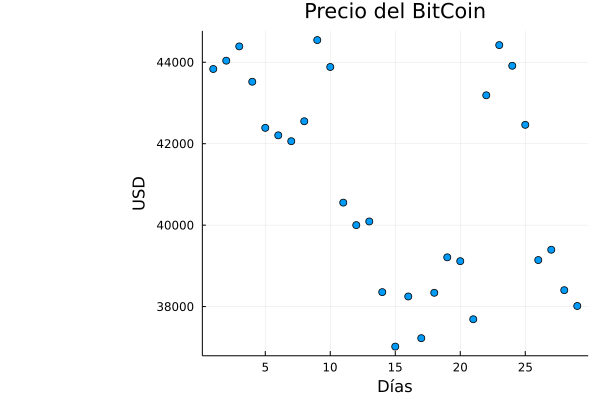

In [8]:
plot(dataBitcoin.Price, 
    title = "Precio del BitCoin", 
    xlabel = "Días",
    ylabel = "USD",
    seriestype = :scatter, 
    label= false,
    legend= :outerleft,
)

De acuerdo a la gráfica es muy difícil saber cuál es el modelo que mejor lo ajusta pues la distribución de los datos no muestra un comportamiendo conocido, por ello proponemos diversos modelos que nos permitan hacer un ajuste a los datos y evaluaremos cuál es más útil para poder predecir el precio del bitcoin de la siguiente semana

------Guiados por la gráfica proponemos diversos modelos que nos permitan hacer un ajuste a los datos, claramente los mejores modelos a plantear no son lineales pues la distribución de los datos en la gráfica no lo sugiere, por lo cual intentaremos con los modelos polinomiales de grado mayor a uno.

In [5]:
using LinearAlgebra

N = size(dataBitcoin.Price,1); # Get the number of entries in the bitcoin dataframe

A_1 = ones(N,1); 
A_2 = Array((1:N)); # Create an array with an enumeration of the registered dates
A_3 = [a^2 for a in A_2];
b = Array(dataBitcoin.Price);

A = [A_1 A_2 A_3]

xhat = A\b

3-element Vector{Float64}:
 45230.62523262178
  -538.6867985592455
    12.95598195525893

###  Punto 3
    
*Use least squares to determine the relationship between the bitcoin price and prices of three comodities namely, oil, silved and gold, during the last year.*    

###  Punto 4
    
*Solve the [point set registration problem](https://en.wikipedia.org/wiki/Point-set_registration). Hint (check: S. Umeyama, Least-Squares Estimation of Transformation Parameters Between Two Point Patterns, IEEE Trans. Pattern Anal. Mach. Intell., vol. 13, no. 4, 1991). Construct a GUI to test.*    

El problema de *Registro de conjunto de puntos* enuncia:

Dado un conjuntos de puntos $\{\mathcal{M},\mathcal{S}\} = \{ (x_i)_{1\leq i \leq n} , (y_i)_{1\leq i \leq m} \} \subset \mathbb{R}^d$ encuentre una trasformación $T^* : \mathbb{R}^d \to \mathbb{R}^d$ de tal forma que los puntos $T(\mathcal{M})$ esten mejor alineados con los puntos $\mathcal{S}$, es decir, que de acuerdo a una función de distancia $\mathbf{dist}(\cdot, \cdot)$ tengamos

$$
    T^*=\arg \min _{T \in \mathcal{T}} \mathbf{dist}(T(\mathcal{M}), \mathcal{S})
$$

donde $\mathcal{T}$ es el  conjuntos de todas transformaciones que escalan, rotan y transladan.

En general puede ocurrir que tengamos que $n \neq m$, para el desarrollo de este ejercicio empezaremos analizando el caso en que $n=m$, para ello haremos uso del resultado que encontramos en [1](https://web.stanford.edu/class/cs273/refs/umeyama.pdf)

## <center> Referencias

[1] S. Umeyama, Least-Squares Estimation of Transformation Parameters Between Two Point Patterns, IEEE Trans. Pattern Anal. Mach. Intell., vol. 13, no. 4, 1991